# **Tugas 2 data_understanding**
## **Penjelasan Outlier Deteksi**
### **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**  
#### 1. Pengantar Outlier dalam Data Understanding
Outlier merupakan titik data dengan nilai yang jauh berbeda dibandingkan sebagian besar data dalam suatu dataset. Keberadaannya dapat disebabkan oleh berbagai faktor, seperti kesalahan dalam pengukuran, kesalahan input data, atau kejadian langka yang memang terjadi secara alami. Pada tahap pemahaman data (Data Understanding), mendeteksi outlier menjadi langkah krusial karena dapat memengaruhi hasil analisis, pemodelan, serta pengambilan keputusan. Jika outlier tidak teridentifikasi, model statistik atau machine learning berisiko menjadi bias, kurang akurat, atau bahkan gagal menghasilkan output yang valid.

#### 2. Konsep K-Nearest Neighbors (KNN) dalam Deteksi Outlier
K-Nearest Neighbors (KNN) merupakan salah satu algoritma yang dapat digunakan untuk mendeteksi outlier. Algoritma ini beroperasi dengan prinsip bahwa data yang normal umumnya berada dalam kelompok yang rapat, sedangkan outlier cenderung terletak jauh dari kelompok tersebut. Berikut adalah konsep dasar KNN dalam mendeteksi outlier:


*   Prinsip Kerja KNN:



KNN menentukan jarak antara suatu titik data dengan titik-titik lain di sekelilingnya. Jika sebuah titik memiliki jarak yang cukup jauh dibandingkan dengan sebagian besar tetangganya, maka titik tersebut dikategorikan sebagai outlier. Secara matematis, KNN menghitung jarak menggunakan metode seperti Euclidean, Manhattan, atau Minkowski terhadap k-tetangga terdekatnya. Jika rata-rata jarak ke k-tetangga tersebut melebihi ambang batas tertentu, maka titik data tersebut dianggap sebagai outlier.

#### Kapan Menggunakan KNN untuk Deteksi Outlier?
KNN adalah metode yang efektif untuk deteksi outlier dalam situasi berikut:

Data Berdimensi Tinggi:
KNN mampu beroperasi dengan baik pada data yang memiliki banyak fitur atau berdimensi tinggi. Namun, jika jumlah dimensinya terlalu besar, performa algoritma ini dapat menurun akibat fenomena "curse of dimensionality".

Data Tanpa Asumsi Distribusi:
KNN tidak bergantung pada asumsi mengenai distribusi data, sehingga dapat digunakan untuk data yang tidak mengikuti distribusi normal atau pola distribusi tertentu.

Dataset dengan Ukuran Sedang:
KNN lebih sesuai untuk dataset berukuran kecil hingga menengah, karena kompleksitas komputasinya meningkat seiring bertambahnya jumlah data. Untuk dataset yang sangat besar, metode lain seperti Local Outlier Factor (LOF) atau Isolation Forest dapat menjadi pilihan yang lebih efisien.

#### Perhitungan K

1. Menghitung Jarak (Euclidean Distance)
Jarak antara dua titik A (dengan koordinat $(x_1, y_1)$  )) dan B (dengan koordinat $(x_2, y_2)$ )) dalam ruang dua dimensi dihitung dengan rumus:

$d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

Untuk data berdimensi n, rumusnya menjadi:

$d(A, B) = \sqrt{\sum_{i=1}^{n} (x_{i}^{A} - x_{i}^{B})^2}$

di mana:

$x_{i}^{A}$ dan $ x_{i}^{B}$ adalah nilai fitur ke- $i $ dari titik $A$ dan $ B$.

 $d(A, B)$ adalah jarak antara dua titik.
2. Prediksi dengan Voting (untuk Klasifikasi)

 Setelah menghitung jarak untuk semua data dalam dataset, ambil $K$  data dengan jarak terdekat, lalu gunakan metode mayoritas:

${y} =$ $(y_1, y_2, ..., y_K)$

di mana ${y} =$ $(y_1, y_2, ..., y_K)$ adalah label dari $K$ tetangga terdekat.

3.  Prediksi dengan Rata-rata (untuk Regresi)
Untuk regresi, prediksi nilai data baru adalah rata-rata dari  $K$  tetangga terdekat:

${y}$ = ${1}{K}$ $_{i=1}^{K} y_i$

di mana $y_1$ dalah nilai target dari $K$ tetangga terdekat.

4. Pemilihan $K$ yang Optimal

Biasanya, nilai $K$ dipilih berdasarkan validasi silang (*cross-validation*) untuk menemukan keseimbangan antara bias dan varians.  

#### Kesimpulan
K-Nearest Neighbors (KNN) merupakan metode yang efektif untuk mendeteksi outlier, terutama pada tahap pemahaman data (Data Understanding). Metode ini bekerja dengan prinsip jarak untuk mengenali titik data yang secara signifikan berbeda dari mayoritas data lainnya. Meskipun KNN menawarkan fleksibilitas dan kemudahan dalam implementasi, metode ini juga memiliki keterbatasan, terutama dalam aspek komputasi dan pemilihan parameter. Oleh karena itu, sebelum menggunakan KNN untuk deteksi outlier, penting untuk mempertimbangkan karakteristik dataset serta kebutuhan analisis.

Dalam aplikasinya, KNN sering dikombinasikan dengan teknik lain, seperti visualisasi data menggunakan scatter plot atau box plot, guna memverifikasi hasil deteksi outlier serta meningkatkan kualitas data sebelum melangkah ke tahap pemodelan.

#### Instalasi Library PyMySQL dan Psycopg2 untuk Koneksi Database di Python

In [1]:
%pip install pymysql
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


1. %pip install pymysql

Perintah ini saya gunakan untuk menginstal library pymysql, yang merupakan driver Python untuk berkomunikasi dengan database MySQL atau MariaDB. Dengan pymysql, saya bisa membuat koneksi ke database, menjalankan query SQL, serta melakukan operasi CRUD (Create, Read, Update, Delete) pada tabel-tabel yang ada. Ini berguna saat saya mengembangkan aplikasi berbasis database, terutama dalam proyek-proyek berbasis web atau sistem berbasis data.

2. %pip install psycopg2

Perintah ini saya gunakan untuk menginstal psycopg2, yang merupakan driver PostgreSQL untuk Python. PostgreSQL adalah database relasional open-source yang cukup powerful dan sering digunakan dalam aplikasi enterprise maupun web. Dengan psycopg2, saya bisa menghubungkan Python dengan database PostgreSQL untuk menjalankan query SQL, mengelola transaksi, serta memanipulasi data dengan efisien.

#### Import Library untuk Analisis Data, Visualisasi, dan Koneksi Database dengan Python

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.neighbors import NearestNeighbors

Di sini saya mengimpor beberapa library yang dibutuhkan untuk menjalankan skrip analisis data dan deteksi outlier:

1. import psycopg2
→ Digunakan untuk menghubungkan Python dengan database PostgreSQL. Library ini memungkinkan eksekusi query SQL, pengambilan data, serta pengelolaan transaksi di PostgreSQL.

2. import pymysql
→ Digunakan untuk menghubungkan Python dengan database MySQL. Dengan library ini, Anda bisa mengambil dan memanipulasi data dari MySQL secara langsung melalui koneksi Python.

3. import numpy as np
→ Library utama untuk komputasi numerik. Digunakan untuk operasi pada array, perhitungan matematis, dan manipulasi data berbasis angka, seperti perhitungan jarak Euclidean dan analisis numerik lainnya.

4. import pandas as pd
→ Library yang digunakan untuk mengelola data dalam bentuk DataFrame, yaitu struktur data yang mudah dibaca dan diolah, sangat cocok untuk analisis data.

5. import seaborn as sns
→ Library visualisasi berbasis matplotlib yang lebih menarik dan interaktif. Digunakan untuk membuat grafik seperti scatter plot yang menampilkan distribusi data dan outlier.

6. import matplotlib.pyplot as plt
→ Modul dari matplotlib yang berfungsi untuk membuat berbagai jenis grafik seperti scatter plot, line plot, dan lain-lain. Dalam skrip ini, digunakan untuk menampilkan visualisasi hasil deteksi outlier.

7. from scipy.spatial.distance import euclidean
→ Digunakan untuk menghitung jarak Euclidean antara dua titik dalam ruang multidimensi. Ini penting untuk menghitung jarak antar titik pada data numerik saat mendeteksi outlier.

8. from sklearn.neighbors import NearestNeighbors
→ Bagian dari scikit-learn yang digunakan untuk algoritma K-Nearest Neighbors (KNN). Dalam skrip ini, digunakan untuk mendeteksi outlier dengan menghitung rata-rata jarak ke beberapa tetangga terdekat.

Kesimpulannya, library yang diimpor ini berfungsi untuk mengambil data dari database, melakukan perhitungan matematis, dan memvisualisasikan hasil analisis.

#### Fungsi untuk Mengambil Data dari Database PostgreSQL menggunakan Python

In [3]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pendat23-posgreesql.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ahuC43u5vzmRtJaxiSx",
        database="defaultdb",
        port=26340
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)



Penjelasan skrip yang saya buat

1. **Membuat Koneksi ke Database**  
   Koneksi ke database PostgreSQL dibuat menggunakan `psycopg2.connect()` dengan parameter host, user, password, database, dan port yang sesuai.

2. **Membuat Objek Cursor**  
   Objek cursor dibuat untuk mengeksekusi perintah SQL.

3. **Menjalankan Query SQL**  
   Query `SELECT * FROM iris_postgresql` dijalankan untuk mengambil semua data dari tabel tersebut.

4. **Mengambil Hasil Query**  
   Data hasil query diambil dalam bentuk list tuple menggunakan `fetchall()`.

5. **Mendapatkan Nama Kolom**  
   Nama kolom diperoleh melalui atribut `cursor.description` agar dapat digunakan sebagai header DataFrame.

6. **Menutup Koneksi**  
   Cursor dan koneksi database ditutup untuk mencegah kebocoran sumber daya.

7. **Mengembalikan Data dalam DataFrame**  
   Data yang diambil dikonversi menjadi DataFrame pandas agar lebih mudah diproses dan dianalisis.

#### Fungsi untuk Mengambil Data dari Database MySQL menggunakan Python

In [4]:
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-aliridwan-mysql23.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_FuVRxg5O9IiRcCsBYdY",
        database="defaultdb",
        port=14789
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

Penjelasan skrip yang saya buat:

1. **Membuat Koneksi ke Database**  
   Koneksi ke database MySQL dibuat menggunakan `pymysql.connect()` dengan parameter host, user, password, database, dan port yang sesuai.

2. **Membuat Objek Cursor**  
   Objek cursor dibuat untuk menjalankan perintah SQL pada database.

3. **Menjalankan Query SQL**  
   Query `SELECT * FROM irismysql` dijalankan untuk mengambil semua data dari tabel `irismysql`.

4. **Mengambil Hasil Query**  
   Data hasil query diambil dalam bentuk list tuple menggunakan `fetchall()`.

5. **Mendapatkan Nama Kolom**  
   Nama kolom diperoleh dari atribut `cursor.description`, yang kemudian diolah agar bisa digunakan sebagai header DataFrame.

6. **Menutup Koneksi**  
   Cursor dan koneksi database ditutup untuk menghindari kebocoran sumber daya.

7. **Mengembalikan Data dalam DataFrame**  
   Data yang diambil dikonversi menjadi DataFrame pandas agar lebih mudah diproses dan dianalisis.

#### Deteksi Outlier pada Data Iris menggunakan K-Nearest Neighbors (KNN)

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
  2     Iris-setosa          14.0          2.0          49.0         30.0     14.671703     True
  3     Iris-setosa           1.3          0.2           4.7          3.2      0.247029    False
  4     Iris-setosa          15.0         20.0          46.0         31.0     16.464817     True
  5     Iris-setosa           1.4          0.2           5.0          3.6      0.191277    False
  6     Iris-setosa           1.7          0.4           5.4          3.9      0.360018    False
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.308980    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.317776    False
 10     Iris-setosa           

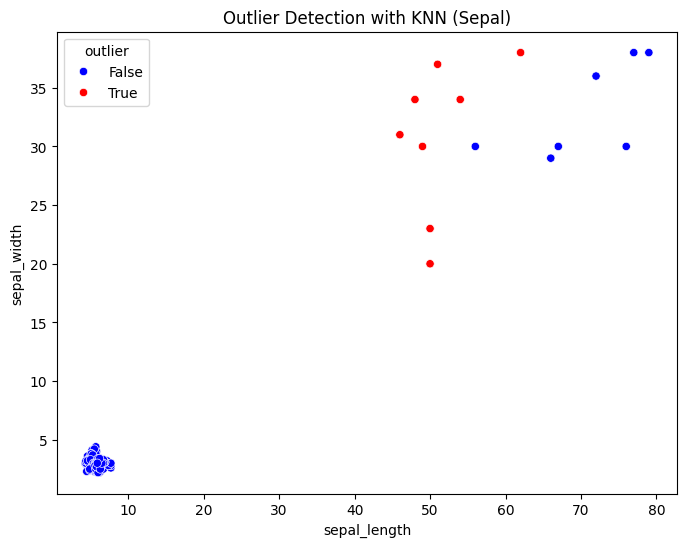

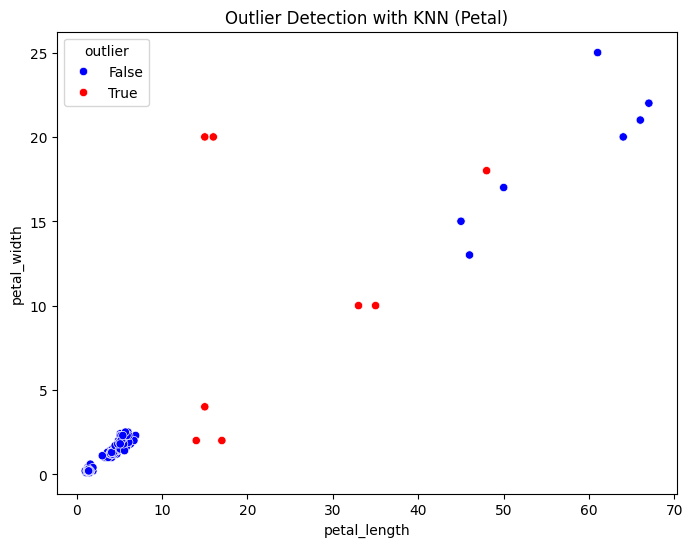

In [5]:
# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Gunakan KNN untuk mendeteksi outlier
K = 5  # Jumlah tetangga terdekat
nbrs = NearestNeighbors(n_neighbors=K+1, metric='euclidean').fit(data_values)
distances, indices = nbrs.kneighbors(data_values)

# Ambil rata-rata jarak ke K tetangga terdekat (tidak termasuk jarak ke dirinya sendiri)
df_merged["knn_distance"] = np.mean(distances[:, 1:], axis=1)

# Tentukan threshold outlier berdasarkan persentil ke-95
threshold = np.percentile(df_merged["knn_distance"], 95)
df_merged["outlier"] = df_merged["knn_distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Petal)")
plt.show()

Penjelasan Skrip diatas:

1. **Mengambil Data**  
   Data diambil dari dua database berbeda, PostgreSQL dan MySQL, menggunakan fungsi tertentu, lalu disimpan dalam DataFrame pandas.

2. **Menggabungkan Data**  
   Kedua DataFrame digabungkan menggunakan inner join berdasarkan kolom `id` dan `class`, sehingga hanya data dengan kedua nilai yang sesuai yang dipertahankan.

3. **Memilih Kolom Fitur Numerik**  
   Empat kolom fitur numerik dipilih, yaitu `petal_length`, `petal_width`, `sepal_length`, dan `sepal_width`, untuk digunakan dalam perhitungan jarak.

4. **Menentukan Titik Referensi**  
   Titik referensi untuk perhitungan jarak Euclidean ditentukan menggunakan baris terakhir dari data tersebut.

5. **Menghitung Jarak Euclidean**  
   Fungsi khusus digunakan untuk menghitung jarak Euclidean antara setiap titik data dengan titik referensi. Hasilnya disimpan dalam kolom `distance`.

6. **Menentukan Threshold Outlier**  
   Threshold outlier ditentukan berdasarkan persentil ke-93.5 dari kolom jarak Euclidean. Data yang jaraknya melebihi nilai ini dianggap outlier.

7. **Mencetak Hasil**  
   Hasil akhir mencakup semua data beserta informasi apakah data tersebut outlier atau tidak.

8. **Visualisasi Scatter Plot**  
   Dua scatter plot dibuat:  
   - Scatter plot pertama menampilkan data berdasarkan `sepal_length` dan `sepal_width`.
   - Scatter plot kedua menampilkan data berdasarkan `petal_length` dan `petal_width`.  
   Pada kedua plot, titik biru menunjukkan data normal, sedangkan titik merah menunjukkan outlier.

#### Menghitung Jumlah Outlier pada Data Iris menggunakan KNN

In [6]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")

Total Outlier: 8


1. df_merged["outlier"].sum()

→ Saya menghitung jumlah total outlier dalam dataset.

Kolom outlier berisi nilai True (1) jika data adalah outlier dan False (0) jika bukan.
Fungsi .sum() menjumlahkan semua nilai True (1), sehingga menghasilkan total jumlah outlier.
2. print(f"Total Outlier: {total_outliers}")

→ Saya mencetak jumlah total outlier dengan format string (f-string).

#### Menampilkan daftar outlier yang terdeteksi

In [7]:
outliers = df_merged[df_merged["outlier"]].sort_values(by="knn_distance", ascending=False)
print("Outlier Teratas:")
print(outliers.to_string(index=False))

Outlier Teratas:
 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
 61 Iris-versicolor          35.0         10.0          50.0         20.0     18.096639     True
 94 Iris-versicolor          33.0         10.0          50.0         23.0     16.878893     True
  4     Iris-setosa          15.0         20.0          46.0         31.0     16.464817     True
 12     Iris-setosa          16.0         20.0          48.0         34.0     16.114105     True
  2     Iris-setosa          14.0          2.0          49.0         30.0     14.671703     True
127  Iris-virginica          48.0         18.0          62.0         38.0     14.631644     True
 21     Iris-setosa          17.0          2.0          54.0         34.0     14.514526     True
 22     Iris-setosa          15.0          4.0          51.0         37.0     14.140652     True


#### Mengurutkan Data Berdasarkan Jarak KNN untuk Identifikasi Outlier

In [8]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="knn_distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))


 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
 10     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
 35     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
 38     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
 40     Iris-setosa           1.5          0.2           5.1          3.4      0.139494    False
 18     Iris-setosa           1.4          0.3           5.1          3.5      0.152207    False
 28     Iris-setosa           1.5          0.2           5.2          3.5      0.164215    False
 29     Iris-setosa           1.4          0.2           5.2          3.4      0.164215    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
 31     Iris-setosa           

#### Memisahkan Outlier dari Data

In [9]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pendat23-posgreesql.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ahuC43u5vzmRtJaxiSx",
        database="defaultdb",
        port=26340
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)


def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-aliridwan-mysql23.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_FuVRxg5O9IiRcCsBYdY",
        database="defaultdb",
        port=14789
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          14.0          2.0          49.0         30.0             -1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa          15.0         20.0          46.0         31.0             -1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

Kode ini bertujuan untuk mendeteksi dan memisahkan outlier dari dataset yang bersumber dari dua basis data, yaitu PostgreSQL dan MySQL. Langkah pertama adalah membangun koneksi ke kedua basis data menggunakan pustaka *psycopg2* untuk PostgreSQL dan *pymysql* untuk MySQL. Setelah koneksi terjalin, query dijalankan untuk mengambil seluruh data dari tabel `iris_postgresql` dan `iris_mysql`. Data yang diperoleh kemudian dikonversi menjadi DataFrame menggunakan pustaka *pandas*.  

Selanjutnya, kedua dataset tersebut digabungkan melalui metode *inner join* berdasarkan kolom `id` dan `class`, sehingga hanya data yang terdapat pada kedua tabel yang akan dipertahankan. Pada tahap berikutnya, hanya fitur numerik seperti `petal_length`, `petal_width`, `sepal_length`, dan `sepal_width` yang dipilih untuk proses deteksi outlier.  

Untuk mendeteksi outlier, digunakan model *Local Outlier Factor* (LOF) dari pustaka *scikit-learn* dengan parameter `n_neighbors=90`. Parameter ini menentukan bahwa setiap data akan dinilai berdasarkan 90 tetangga terdekatnya untuk mengidentifikasi apakah data tersebut merupakan outlier. Model LOF akan memberikan label 1 pada data yang dianggap normal dan -1 pada data yang terdeteksi sebagai outlier.  

Setelah penerapan model LOF, hasil deteksi outlier ditambahkan ke dalam DataFrame dalam kolom baru bernama `outlier_label`. Jumlah total outlier kemudian dihitung dengan menjumlahkan data yang memiliki label -1. Dataset dipisahkan menjadi dua bagian: data normal yang memiliki label 1 disimpan dalam variabel `df_filtered`, sedangkan data yang terdeteksi sebagai outlier disimpan dalam variabel `outliers`.

Sebagai output akhir, hasil deteksi ditampilkan dengan menyajikan dataset yang telah diberi label, jumlah total outlier yang ditemukan, serta daftar data yang termasuk dalam kategori outlier maupun data yang tetap setelah proses pembersihan. Langkah ini bertujuan untuk meningkatkan kualitas data dengan menghilangkan nilai ekstrem yang berpotensi menyebabkan bias dalam analisis atau model pembelajaran mesin.

#### Menghitung Akurasi dari Data

In [10]:
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Akurasi tanpa outlier: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



Kode ini dirancang untuk membandingkan akurasi dan hasil klasifikasi model *K-Nearest Neighbors* (KNN) pada dua kondisi dataset: satu yang masih mengandung outlier dan satu yang telah dibersihkan dari outlier.  

Proses dimulai dengan mengekstraksi fitur numerik dari DataFrame yang telah digabungkan sebelumnya untuk digunakan dalam pemodelan. Selain itu, label kelas dikonversi ke format numerik menggunakan *LabelEncoder*. Model *Local Outlier Factor* (LOF) diterapkan kembali dengan parameter `n_neighbors=90` dan `contamination=0.1`, yang menandakan bahwa sekitar 10% data akan diidentifikasi sebagai outlier. Hasil deteksi ini ditambahkan ke dalam DataFrame sebagai kolom baru, kemudian dataset dibagi menjadi dua bagian: satu bagian dengan data asli yang masih mengandung outlier, dan satu lagi yang telah melalui proses pembersihan outlier.

Selanjutnya, kedua dataset tersebut dibagi menjadi data pelatihan (80%) dan data pengujian (20%) menggunakan fungsi *train_test_split*. Hal ini menghasilkan dua set data pelatihan dan pengujian—masing-masing untuk dataset dengan outlier dan tanpa outlier.  

Model KNN dengan jumlah tetangga sebanyak 11 diterapkan menggunakan *Pipeline*, yang terlebih dahulu melakukan standarisasi data dengan *StandardScaler* sebelum melatih model KNN. Model pertama dilatih menggunakan data yang masih mengandung outlier, lalu dilakukan prediksi pada data uji. Hasil prediksi tersebut dibandingkan dengan label aslinya untuk menghitung akurasi serta menampilkan laporan klasifikasi yang mencakup metrik seperti *precision*, *recall*, dan *F1-score* untuk setiap kelas. Langkah yang sama diterapkan pada dataset yang telah dibersihkan dari outlier.

Sebagai hasil akhir, kode ini menampilkan dua nilai akurasi: satu untuk model yang dilatih dengan data yang masih mengandung outlier, dan satu lagi untuk model yang dilatih dengan data yang telah dibersihkan. Selain itu, laporan klasifikasi disajikan untuk menunjukkan dampak keberadaan outlier terhadap performa model. Umumnya, model yang dilatih pada data tanpa outlier diharapkan memberikan hasil yang lebih akurat, karena outlier berpotensi mengganggu perhitungan jarak pada algoritma KNN sehingga dapat menyebabkan prediksi yang keliru. Dengan membandingkan kedua hasil ini, pengguna dapat memahami sejauh mana outlier memengaruhi performa klasifikasi dan menentukan apakah pembersihan data berdampak positif terhadap hasil model.